# Analyze employee resignation due to dissatisfaction

In this project, I will be working with two datasets of exit surveys  results from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

My goal is to answer the following questions: 
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

First let read in the data and explore it a bit:

In [1]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

I observed many missing values in DETE data set, especially information on the employee origin (`Torres Strait`/`Aboriginal`) and disability. There are also abbreviate data in a few columns (`Kept informed`, `Wellness programs`, `Health & Safety`) with no explanations.

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

For the TAFE data set, the column names are very long and inconsistent (`Contributing Factors. Study`, `LengthofServiceOverall. Overall Length of Service at Institute (in years)`). These column names need to be standardized. There are also missing values but no column with extreme amount of missing values.

The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN. 

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

The two data set contains many columns that are not needed for my analysis so I will drop them.

In [7]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [8]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Also, some columns contain the same information but were named differently in the two data sets, so I will need to standardize them and change to snake case before merging the two datasets.

In [9]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()

In [10]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
name_change = {'Record ID':'id', 'CESSATION YEAR':'cease_date', 'Reason for ceasing employment':'separationtype', 'Gender. What is your Gender?':'gender', 'CurrentAge. Current Age':'age', 'Employment Type. Employment Type':'employment_status',
'Classification. Classification':'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}

In [12]:
tafe_survey_updated.rename(name_change, axis=1, inplace=True)

In [13]:
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


Now let's have a look at the different types of separation in these two datasets.

In [14]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [15]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

There are several different separation types, with resignation accounts for the most common one. Thus in this project, I'll only analyze survey respondents who resigned, so their separation type contains the string `Resignation`.

The DETE data set contains multiple separation types with the string 'Resignation':
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

I'll have to account for each of these variations so I don't unintentionally drop data!

I select only the data for survey respondents who have a `Resignation` separation type by creating a regex and use `str.contains` method to get a series of boolean values, and use this series to index the dataframe:

In [16]:
resign = r"Resignation-?"
dete_resign = dete_survey_updated['separationtype'].str.contains(resign, na=False)
dete_resignations = dete_survey_updated[dete_resign].copy()

Let's print the first 5 rows of the `separationtype` in DETE dataset column to confirm if the filtering works:

In [17]:
print(dete_resignations['separationtype'].head())

3                Resignation-Other reasons
5                Resignation-Other reasons
8                Resignation-Other reasons
9               Resignation-Other employer
11    Resignation-Move overseas/interstate
Name: separationtype, dtype: object


Looks like it's working, let's do the same thing for the TAFE dataset:

In [18]:
tafe_resign = tafe_survey_updated['separationtype'].str.contains(resign, na=False).copy()

In [19]:
tafe_resignations = tafe_survey_updated[tafe_resign].copy()
print(tafe_resignations['separationtype'].head())

3    Resignation
4    Resignation
5    Resignation
6    Resignation
7    Resignation
Name: separationtype, dtype: object


Now let's check for errors in the data set before moving on to analysis. For TAFE dataset, the length of service was provided, but for DETE dataset, I need to use the start date and cease date to calculate length of service. So I will look at the column `cease_date` in DETE dataset:

In [20]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
07/2006      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

Since the `cease_date` is the last year of the person's employment, it wouldn't make sense to have years after the current date. All the values in `cease_date` column look normal. Let's extract only the year from this column for later calculation:

In [21]:
year_regex = r"([0-1][0-9])?/?([1-2][0-9]{3})"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(year_regex)[1].astype(float)

In [22]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

Now let's look at the `dete_start_date` column:

In [23]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

This column is already in year format and all values seem normal. In addition, the earliest `dete_start_date` was in 1963 (after the year 1940), which is logical given that most people start working in their 20s and retire in their 60-70s. Now let's look at the TAFE dataset:

In [24]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

It seems that there is no issue with the data for `cease_date` for TAFE dataset as well. Now let's calculate the length of service for DETE dataset using the `cease_date` and `dete_start_date` columns:

In [25]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [26]:
print(dete_resignations['institute_service'])

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64


The next thing is to look at the number of people who resigned due to dissatisfaction. In both dataset, dissatisfaction is represented in multiple columns e.g. `Contributing Factors. Dissatisfaction`, `Contributing Factors. Job Dissatisfaction` in TAFE dataset, `job_dissatisfaction`, `dissatisfaction_with_the_department`, `lack_of_recognition` in DETE dataset.

In [27]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [28]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

I will filter out only employees who resigned due to dissatisfaction (the word `Dissatisfaction` appears in these columns):

In [29]:
dissatisfy = r"Dissatisfaction"
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].str.contains(dissatisfy)

In [30]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].str.contains(dissatisfy)

In [32]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [33]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False).copy()

In [34]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Looks like dissatisfaction accounts for almost 30% of resignation of TAFE employees. Next, I will combine columns in DETE dataset: 

In [35]:
cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']
dete_resignations['dissatisfied'] = dete_resignations[cols].any(axis=1, skipna=False).copy()

In [36]:
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In DETE, dissatisfaction accounts for approximately 50% of resignation. Now let's combine the two datasets for final analysis.

In [37]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

In [38]:
dete_resignations_up['institute'] = 'DETE'

In [39]:
tafe_resignations_up['institute'] = 'TAFE'

In [40]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], join='inner')

In [41]:
combined.describe(include='all')

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
count,6.510000e+02,651,635.000000,598,597,592,596,563,643,651
unique,NaN,4,NaN,21,6,2,17,49,2,2
top,NaN,Resignation,NaN,Administration (AO),Permanent Full-time,Female,51-55,Less than 1 year,False,TAFE
freq,NaN,340,NaN,148,256,424,71,73,403,340
mean,3.314265e+17,NaN,2011.963780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.172210e+17,NaN,1.079028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000000e+00,NaN,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.525000e+02,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.341820e+17,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.345770e+17,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To explore the relationship between resignation due to dissatisfaction and length of service/employee age, I need to deal with missing values in `dissatisfied` column:

In [42]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

There are only 8 missing values in this column. I will fill these values using the most common values in this column `False`:

In [43]:
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)

The column `institute_service` show how long an employee has worked for the organization. Let's have a look at this column in the combined dataset:

In [44]:
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


The value in this column is not in the same format at the moment, varies from single number `2.0`, to range `7-10` to string `More than 20 years`. I will standardize this column by first converting all string to number:

In [46]:
import re

regex1 = r"[0-9]*-[0-9]*"
regex2 = r"[0-9]*.[0]"

def change_exp(col):
    if col == 'Less than 1 year':
        return '1'
    elif col == 'More than 20 years':
        return '20'
    elif re.match(regex1, col):
        return col.split('-')[1]
    elif re.match(regex2, col):
        return col.split('.')[0]
    else:
        return 'NaN'
combined['institute_service'] = combined['institute_service'].astype('str')
combined['institute_service'] = combined['institute_service'].apply(change_exp)
    

In [47]:
combined['institute_service'].value_counts().sort_index()

0      20
1      95
10     27
11      4
12      6
13      8
14      6
15      7
16      5
17      6
18      5
19      3
2      78
20     43
21      3
22      6
23      4
24      4
25      2
26      2
27      1
28      2
29      1
3      20
30      2
31      1
32      3
33      1
34      1
35      1
36      2
38      1
39      3
4      79
41      1
42      1
49      1
5      23
6      50
7      13
8       8
9      14
NaN    88
Name: institute_service, dtype: int64

In [48]:
combined['institute_service'] = combined['institute_service'].astype('float')

Then I will sort these values into different categories based on how long the length of service was:

In [51]:
def exp_cat(col):
    if col < 3:
        return 'New'
    elif 3 <= col < 7:
        return 'Experienced'
    elif 7 <= col < 11:
        return 'Established'
    elif 11 <= col:
        return 'Veteran'
    elif pd.isnull(col):
        return np.nan
    
combined['service_cat'] = combined['institute_service'].apply(exp_cat)

In [52]:
combined['service_cat'].value_counts(dropna=False).sort_values()

Established     62
NaN             88
Veteran        136
Experienced    172
New            193
Name: service_cat, dtype: int64

I will create a pivot table to capture the relationship between dissatisfaction and length of service:

<AxesSubplot:xlabel='service_cat'>

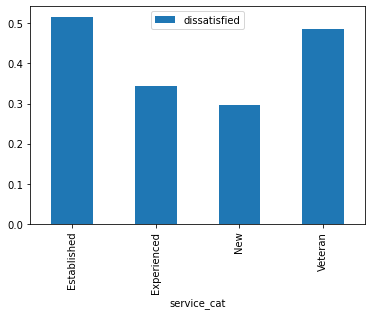

In [53]:
%matplotlib inline
pv_exp_satisfy = combined.pivot_table(index='service_cat', values='dissatisfied')
pv_exp_satisfy.plot(kind='bar')

The overall trend is that dissatisfaction increase with length of service, except for people who have work in the organization for 11 years or more. Now let's see if how dissatisfaction change among young and old employees:

In [54]:
combined['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [55]:
combined.dtypes

id                   float64
separationtype        object
cease_date           float64
position              object
employment_status     object
gender                object
age                   object
institute_service    float64
dissatisfied            bool
institute             object
service_cat           object
dtype: object

In [56]:
regex3 = r"[0-9]* [0-9]*"

def change_age(col):
    if col == '20 or younger':
        return '20'
    elif col == '56 or older':
        return '56'
    elif col == '61 or older':
        return '61'
    elif re.match(regex1, col):
        return col.split('-')[1]
    elif re.match(regex3, col):
        return col.split()[1]
    else:
        return 'NaN'
combined['age'] = combined['age'].astype('str')    
combined['age'] = combined['age'].apply(change_age)

In [57]:
combined['age'].value_counts(dropna=False).sort_index()

20     10
25     62
30     67
35     61
40     73
45     93
50     81
55     71
56     29
60     26
61     23
NaN    55
Name: age, dtype: int64

In [58]:
def age_cat(col):
    if col <= 35:
        return 'Young employee'
    elif 35 < col <= 55:
        return 'Middle age employee'
    elif 55 < col:
        return 'Old employee'
    elif pd.isnull(col):
        return np.nan
combined['age'] = combined['age'].astype(float)    
combined['age_cat'] = combined['age'].apply(age_cat)

In [59]:
combined['age_cat'].value_counts(dropna=False).sort_values()

NaN                     55
Old employee            78
Young employee         200
Middle age employee    318
Name: age_cat, dtype: int64

<AxesSubplot:xlabel='age_cat'>

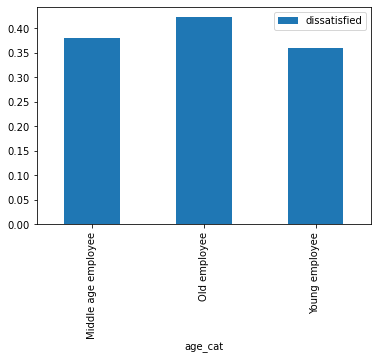

In [60]:
%matplotlib inline
pv_age_satisfy = combined.pivot_table(index='age_cat', values='dissatisfied')
pv_age_satisfy.plot(kind='bar')

Dissatisfaction also increase with age of the employee, which means older employee are more likely to have dissatisfaction, which make sense since most old employees would have longer length of service than young employees.